In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/arvind/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [3]:
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
model = XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
print(model.feature_importances_)

[0.10621197 0.2424023  0.08803366 0.07818192 0.10381887 0.1486732
 0.10059207 0.13208601]


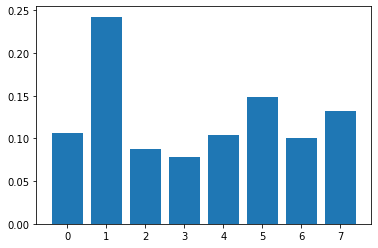

In [6]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [7]:
from xgboost import plot_importance

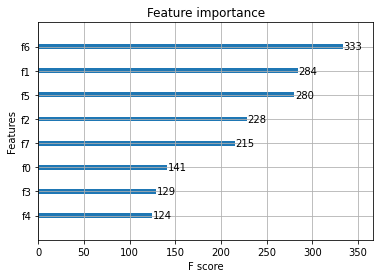

In [8]:
plot_importance(model)
pyplot.show()

In [9]:
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [11]:
dataset=loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [12]:
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=7)

In [13]:
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [14]:
print("Accuracy: %.2f%%" %(accuracy*100.0))

Accuracy: 74.02%


In [15]:
thresholds = sort(model.feature_importances_)

In [20]:
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit = True)
    select_X_train = selection.transform(X_train)
    
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" %(thresh, select_X_train.shape[1],accuracy*100.0))

Thresh=0.088, n=8, Accuracy: 74.02%
Thresh=0.089, n=7, Accuracy: 71.65%
Thresh=0.098, n=6, Accuracy: 71.26%
Thresh=0.098, n=5, Accuracy: 74.41%
Thresh=0.100, n=4, Accuracy: 74.80%
Thresh=0.136, n=3, Accuracy: 71.26%
Thresh=0.152, n=2, Accuracy: 71.26%
Thresh=0.240, n=1, Accuracy: 67.32%
